# 필수 라이브러리 설치

아래 라이브러리를 <u>반드시 설치</u>하고 시험을 치릅니다.<br>
**gensim** 과 **numpy**의 버전 호환성 문제로 triu from 'scipy.linag' 오류가 날 수 있으니,<br>
requirements.txt에 있는 라이브러리만 설치합니다.

- pip install -r requirements.txt

![image.png](questions/Q1.png)

In [2]:
from konlpy.tag import Okt


okt = Okt()

# file load
with open("./sample_corpus_hangul.txt", 'r', encoding='utf-8') as fp:
    temp = fp.readlines()
 
# strip
lines = [line.strip() for line in temp]

# morph
print(okt.morphs(lines))

AssertionError: phrase input should be string, not <class 'list'>

![image.png](questions/Q2.png)

In [4]:
# 이곳에 코드를 작성하시오
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(analyzer='word')

with open("./sample_corpus.txt", 'r', encoding='utf-8') as fp:
    temp = fp.readlines()
lines = [line.strip() for line in temp]

result = tfidf_vectorizer.fit_transform(lines).toarray()

temp_dict = {}

for idx, (line, tfidf_vec) in enumerate(zip(lines, result)):
    temp_dict[idx] = {
        "sentence": line,
        'tfidf_vec': tfidf_vec
    }

df = pd.DataFrame(temp_dict)

df.head()

,0,1,2,3,4,5,6,7
sentence,코로나 거리두기와 코로나 상생지원금 문의입니다.,지하철 운행시간과 지하철 요금 문의입니다.,지하철 승강장 문의입니다.,코로나 선별진료소 문의입니다.,버스 운행시간 문의입니다.,버스 터미널 위치 안내입니다.,코로나 거리두기 안내입니다.,택시 승강장 문의입니다.
tfidf_vec,"[0.0, 0.47991911388321157, 0.23982074690780975...","[0.0, 0.0, 0.22216587283622857, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.3884995384988719, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.3753175146682932, 0.0, 0.0, 0.751...","[0.0, 0.0, 0.3576590914547677, 0.5998394548299...","[0.0, 0.0, 0.0, 0.45419450284733365, 0.0, 0.0,...","[0.6703439317463478, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.3576590914547677, 0.0, 0.0, 0.0, ..."


![image.png](questions/Q3.png)

In [5]:
# 이곳에 코드를 작성하시오
import pandas as pd
from konlpy.tag import Okt

okt = Okt()

df = pd.read_csv("ratings_train.txt", sep='\t')
target = df[-100:]

# target(DataFrame)을 순환하며 명사 추출 후, embedding 컬럼으로 생성
for idx, row in target.iterrows():
    tokenized = okt.nouns(row['document'])
    row['embedding'] = tokenized
    
print(target.head())

              id                                           document  label
149900   9392240  진짜엄청재미없다 무서운장면은 딱한번나오고 그3초말고는 하나도안무섭고 지루하고 끝나고...      0
149901  10141935  너무 짜증나서, 끝은봐야해서 2배속빨리보기했다. 안본사람 호기심이라도 같지말길. 가...      0
149902   9641183                                설명은 줄이고 조율이 필요한 영화.      0
149903  10276386            이야~~~40만 넘었내..베테랑은 9백만 넘었는데...나 협심증 걸렸다      0
149904   4403898                        전형적인 유치뽕짝 프랑스영화 새로운장르다 유치뽕짝      0


![image.png](questions/Q4.png)

In [6]:
# 이곳에 코드를 작성하시오.
from gensim.models import Word2Vec
import numpy as np

sentences = [row['embedding'] for idx, row in target.iterrows()]

model = Word2Vec(
    sentences=sentences,
    vector_size=10,
    min_count=1,
    window=5,
)

for idx, row in target.iterrows():
    row['embedding'] = model.wv[row['embedding']]

print(target.head())

KeyError: 'embedding'

![image.png](questions/Q5.png)

In [7]:
# 이곳에 코드를 작성하시오
# 5.1
a = 'hello world'
a += ' 202'
a = list(a) + ['Hello there']
print(a)

# 5.2.
d1 = {'David': 25, 'Nami': 20, 'John': 28}
d2 = {'Johnson': 21, 'Ethan': 30}
d1.update(d2)

print(d1)

['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', ' ', '2', '0', '2', 'Hello there']
{'David': 25, 'Nami': 20, 'John': 28, 'Johnson': 21, 'Ethan': 30}


![image.png](questions/Q6.png)

In [8]:
# 이곳에 코드를 작성하시오 
import numpy as np

temp = np.array([2,4,6,8,10])
temp *= 2
print(temp)

[ 4  8 12 16 20]


![image.png](questions/Q7.png)

In [9]:
# 이곳에 코드를 작성하시오.
import pandas as pd

data = {
    'category': ['A', 'B', 'A', 'B'],
    'Name': ['John', 'Anna', 'Perter', 'Linda'],
    'Age': [28, 34, 45, 32],
    'Income': [50000, 60000, 80000, 75000]
}

df = pd.DataFrame(data)

print("평균 나이: ", df['Age'].mean())
print("평균 수입: ", df['Income'].mean())

평균 나이:  34.75
평균 수입:  66250.0


![image.png](questions/Q8.png)

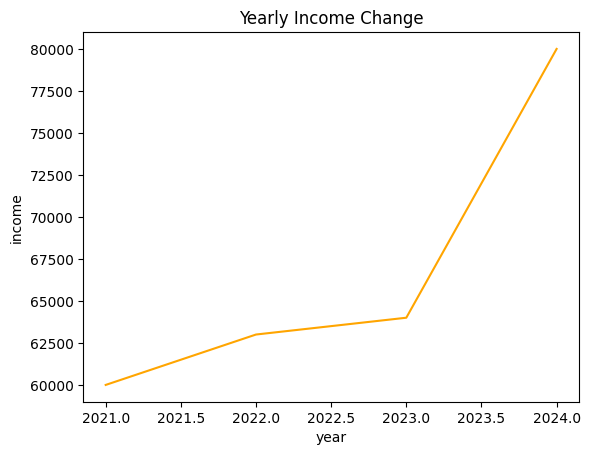

In [10]:
# 이곳에 코드를 작성하시오
import matplotlib.pyplot as plt

year = [2021, 2022, 2023, 2024]
income = [60000, 63000, 64000, 80000]

plt.xlabel('year')
plt.ylabel('income')
plt.title('Yearly Income Change')
plt.plot(year, income, color='orange')
plt.show()